Actual columns in your CSV file: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


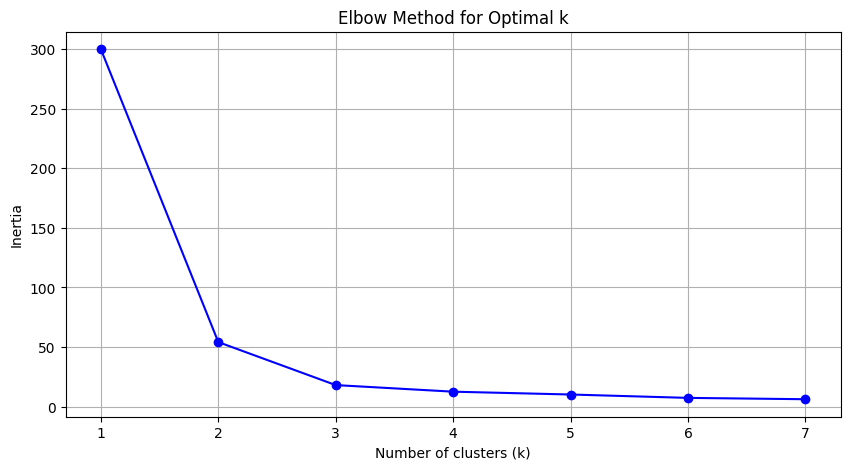

<ipython-input-5-b4aec05a3420>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusters


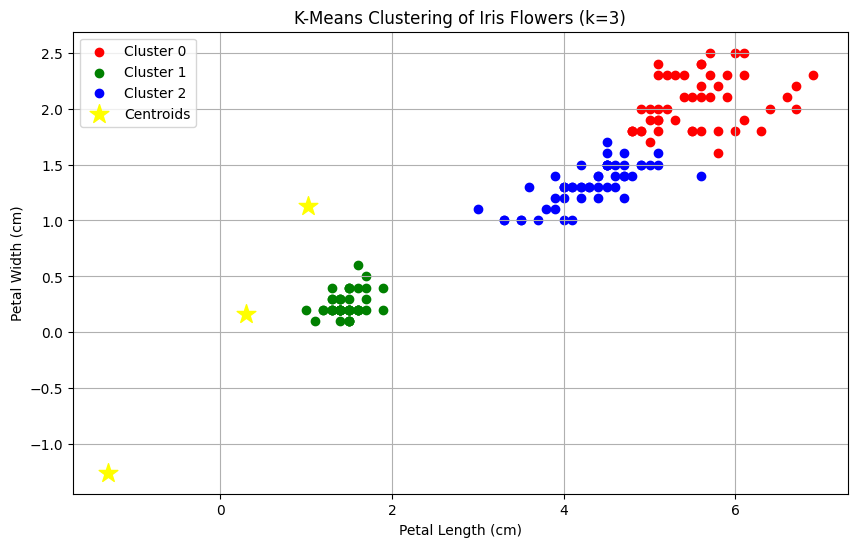

Silhouette Score: 0.674


In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load and examine data
iris = pd.read_csv("/content/iris (4).csv")
print("Actual columns in your CSV file:", iris.columns.tolist())  # This will show us the correct column names

# Prepare data - ADJUST THESE BASED ON THE OUTPUT ABOVE
# Common column name variations for petal features:
petal_length_col = 'petal_length'  # Try these common alternatives
petal_width_col = 'petal_width'    # if the first attempt fails

# Try to find the correct columns automatically
possible_length_names = ['petal_length', 'petal length (cm)', 'petallength', 'PetalLength', 'petal.length']
possible_width_names = ['petal_width', 'petal width (cm)', 'petalwidth', 'PetalWidth', 'petal.width']

# Find matching columns
petal_length_col = next((col for col in iris.columns if col.lower() in [name.lower() for name in possible_length_names]), None)
petal_width_col = next((col for col in iris.columns if col.lower() in [name.lower() for name in possible_width_names]), None)

if not petal_length_col or not petal_width_col:
    raise ValueError("Could not identify petal length/width columns in the CSV. Please check the column names.")

data = iris[[petal_length_col, petal_width_col]]
data.columns = ['petal length (cm)', 'petal width (cm)']  # Standardize names

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Elbow method to find optimal k
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 8), inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Build final model with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters to dataframe
data['cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(optimal_k):
    plt.scatter(data[data['cluster'] == i]['petal length (cm)'],
                data[data['cluster'] == i]['petal width (cm)'],
                c=colors[i], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='*', label='Centroids')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering of Iris Flowers (k=3)')
plt.legend()
plt.grid()
plt.show()

# Evaluate clustering
print(f"Silhouette Score: {silhouette_score(scaled_data, clusters):.3f}")